In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
import numpy as np
register_matplotlib_converters()
import math
import scipy

In [2]:
transducer = pd.read_excel("2019-2020 Cistern Level vs Rain.xlsx")
transducer = transducer.drop([0, 1, 2, 3])
transducer[["TOA5"]] = transducer[["TOA5"]].astype(str)
transducer["TOA5"] = pd.to_datetime(transducer["TOA5"], format = "%Y-%m-%d %H:%M:%S")
transducer = transducer.rename(columns={"TOA5": "Date", "18770": "RG-Offset", 'Unnamed: 8':"RG-Stage"})
transducer["RG-Stage"] = transducer["RG-Stage"].astype(float)
transducer = transducer.rename(columns={"Unnamed: 10": "RG-Depth"})
transducer["RG-Depth"] = transducer["RG-Depth"].astype(float)
transducer = transducer.iloc[62000:102000, :]

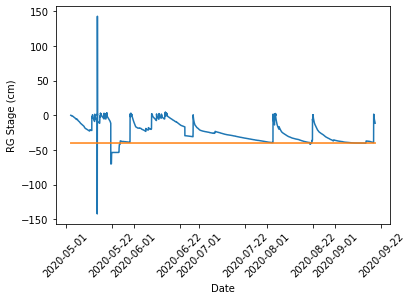

In [3]:
plt.plot(transducer["Date"],transducer["RG-Stage"])
plt.plot(transducer["Date"],  np.full((len(transducer["Date"]), 1), -40))
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("RG Stage (cm)")
plt.show()

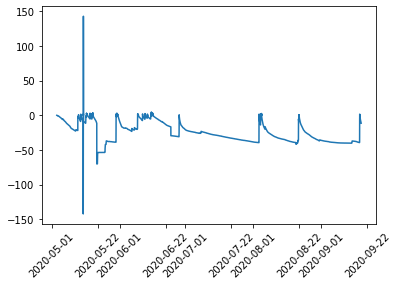

In [4]:
plt.plot(transducer["Date"],transducer["RG-Stage"])
plt.xticks(rotation=45)
plt.show()

Let's take a look at that specific region in the middle of September.

In [5]:
september = transducer.iloc[31900:38500, :]


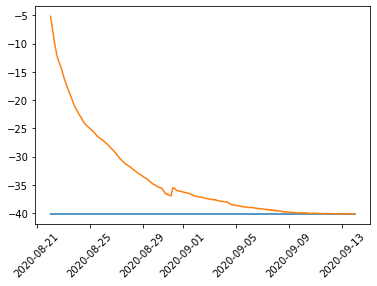

The min stage reached is  -40.12947 cm


In [6]:
min_stage = min(september["RG-Stage"])
plt.plot(september["Date"], np.full((len(september["Date"]), 1), min_stage))

plt.plot(september["Date"],september["RG-Stage"])
plt.xticks(rotation=45)
plt.show()
print("The min stage reached is ", min_stage, "cm")

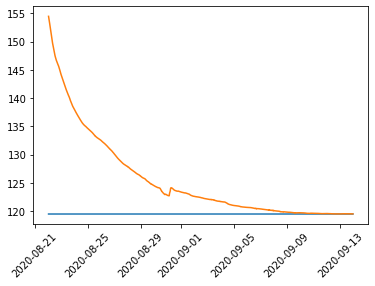

The min depth reached is  119.5205 cm


In [7]:
min_depth = min(september["RG-Depth"])
plt.plot(september["Date"], np.full((len(september["Date"]), 1), min_depth))
plt.plot(september["Date"],september["RG-Depth"])
plt.xticks(rotation=45)
plt.show()
print("The min depth reached is ", min_depth, "cm")

Let's move forward with stage WLOG

In [8]:
p = np.polyfit(september["Date"].astype(int),september["RG-Stage"], 12)
predict = np.poly1d(p)

/Users/andyflury/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/polynomial.py:629: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/Users/andyflury/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
def format_poly(p):
    final = ""
    highest_deg = len(p) - 1
    for coeff in p:
        coeff = str(math.ceil(coeff*100000)/100000)
        if (highest_deg == 0):
            final = final +coeff
        else:
            final= final+coeff+"x^"+str(highest_deg)+"+"
            highest_deg -= 1
    return final

In [10]:
predict_y = [predict(d) for d in september["Date"].astype(int)]


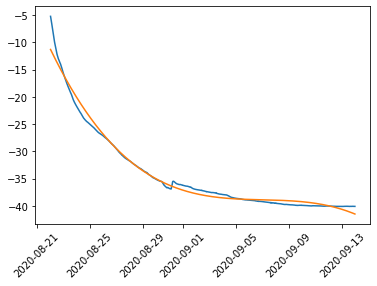

The min stage reached is  -40.12947 cm
Polynomial of best fit is  0.0x^12+0.0x^11+0.0x^10+0.0x^9+0.0x^8+1e-05x^7+1e-05x^6+1e-05x^5+0.0x^4+0.0x^3+0.0x^2+0.0x^1+2943695085.38029


In [11]:
plt.plot(september["Date"],september["RG-Stage"])
plt.plot(september["Date"],predict_y)
plt.xticks(rotation=45)
plt.show()
print("The min stage reached is ", min_stage, "cm")
print("Polynomial of best fit is ", format_poly(p))

Using an exponential model

In [12]:
x, y = (september["Date"].astype(int) - september["Date"].astype(int).iloc[0]), september["RG-Stage"]
a, b = scipy.optimize.curve_fit(lambda t,a,b,c: a*np.exp(b*t)+c,  x,  y, p0=(4, -.00000000003,-40))
predict_y = [a[0]*np.exp(a[1]*d) + a[2] for d in x]

/Users/andyflury/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [13]:
a[2]

-40.047745549489115

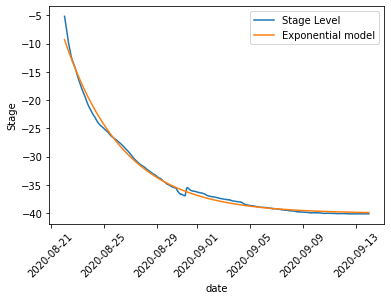

The min stage reached is  -40.12947 cm
Polynomial of best fit is 3*e^(-2.6e-15x)-40


In [235]:
plt.plot(september["Date"],september["RG-Stage"])
plt.plot(september["Date"],predict_y)
plt.xticks(rotation=45)
plt.xlabel("date")
plt.ylabel("Stage")
plt.legend(["Stage Level", "Exponential model"])
plt.show()
print("The min stage reached is ", min_stage, "cm")
print("Polynomial of best fit is 3*e^(-2.6e-15x)-40")